In [1]:
from pymongo import MongoClient
import pyarabic as araby #module for normalizing arabic
from __future__ import absolute_import, print_function, unicode_literals, division
from pyarabic import araby as arabconst
import unicodedata
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, TreebankWordTokenizer, WordPunctTokenizer, RegexpTokenizer
from nltk.stem import ISRIStemmer

In [2]:
# Connect to MongoDB
client = MongoClient('localhost', 27017)
# Access our database
db = client['arabic_database']
# Access our collection
collection = db['article']

articles = collection.find()

In [3]:
# Retrieve the first article
article = collection.find_one()
print(article)

{'_id': ObjectId('6610963b235e5906dd0df379'), 'url': 'https://althawrah.ye/archives/861481', 'title': 'مفوضية شؤون اللاجئين في اليمن تعلن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية العام الحالي 2024م', 'pub_date': 'فبراير 13, 2024', 'category': 'اقتصاد', 'content': 'الثورة / متابعات أعلنت المفوضية السامية لشؤون اللاجئين التابعة للأمم المتحدة، عن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية المقدمة للنازحين واللاجئين في اليمن خلال العام 2024. وذكر تقرير صادر عن المفوضية أن عدد النازحين داخلياً في اليمن يقدر بنحو 4.56 مليون نازح، بالإضافة إلى أكثر من 70 ألف لاجئ وطالب لجوء. وبحسب التقرير فإن الأفراد والأسر النازحة معرضون للخطر بشكل خاص، مع انخفاض إمكانية الوصول إلى الخدمات الأساسية وسبل العيش، ويواجهون العديد من مخاطر الحماية غالباً، ويلجأ الكثيرون إلى آليات التكيف السلبية من أجل تدبر أمورهم، بما في ذلك تخطي وجبات الطعام، والتسرب من المدارس، وعمالة الأطفال، والحصول على القروض، والانتقال إلى مأوى أقل جودة، والزواج المبكر. وأوضحت المفوضية في تقريرها أن 85 % من المستفيدين من

In [4]:
# Extract only for now title and content
title = article['title']
content = article['content']
date = article['pub_date']

In [5]:
content

'الثورة / متابعات أعلنت المفوضية السامية لشؤون اللاجئين التابعة للأمم المتحدة، عن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية المقدمة للنازحين واللاجئين في اليمن خلال العام 2024. وذكر تقرير صادر عن المفوضية أن عدد النازحين داخلياً في اليمن يقدر بنحو 4.56 مليون نازح، بالإضافة إلى أكثر من 70 ألف لاجئ وطالب لجوء. وبحسب التقرير فإن الأفراد والأسر النازحة معرضون للخطر بشكل خاص، مع انخفاض إمكانية الوصول إلى الخدمات الأساسية وسبل العيش، ويواجهون العديد من مخاطر الحماية غالباً، ويلجأ الكثيرون إلى آليات التكيف السلبية من أجل تدبر أمورهم، بما في ذلك تخطي وجبات الطعام، والتسرب من المدارس، وعمالة الأطفال، والحصول على القروض، والانتقال إلى مأوى أقل جودة، والزواج المبكر. وأوضحت المفوضية في تقريرها أن 85 % من المستفيدين من خدماتها يفضلون الحصول على الدعم نقداً (كلياً أو جزئيا)، مؤكدة أن المساعدات النقدية تمكن العائلات النازحة من شراء السلع والخدمات من الشركات المحلية، مما يعزز الاقتصاد المحلي، كما أنها واحدة من أكثر طرق الدعم سرعة وكفاءة وفعالية. وبلغ إجمالي المساعدات النقدية التي قدمتها المف

In [6]:
print(title)

مفوضية شؤون اللاجئين في اليمن تعلن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية العام الحالي 2024م


In [7]:
print(content)

الثورة / متابعات أعلنت المفوضية السامية لشؤون اللاجئين التابعة للأمم المتحدة، عن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية المقدمة للنازحين واللاجئين في اليمن خلال العام 2024. وذكر تقرير صادر عن المفوضية أن عدد النازحين داخلياً في اليمن يقدر بنحو 4.56 مليون نازح، بالإضافة إلى أكثر من 70 ألف لاجئ وطالب لجوء. وبحسب التقرير فإن الأفراد والأسر النازحة معرضون للخطر بشكل خاص، مع انخفاض إمكانية الوصول إلى الخدمات الأساسية وسبل العيش، ويواجهون العديد من مخاطر الحماية غالباً، ويلجأ الكثيرون إلى آليات التكيف السلبية من أجل تدبر أمورهم، بما في ذلك تخطي وجبات الطعام، والتسرب من المدارس، وعمالة الأطفال، والحصول على القروض، والانتقال إلى مأوى أقل جودة، والزواج المبكر. وأوضحت المفوضية في تقريرها أن 85 % من المستفيدين من خدماتها يفضلون الحصول على الدعم نقداً (كلياً أو جزئيا)، مؤكدة أن المساعدات النقدية تمكن العائلات النازحة من شراء السلع والخدمات من الشركات المحلية، مما يعزز الاقتصاد المحلي، كما أنها واحدة من أكثر طرق الدعم سرعة وكفاءة وفعالية. وبلغ إجمالي المساعدات النقدية التي قدمتها المفو

In [8]:
# Function to remove HTML tags
def remove_html_tags(text):
    html_pattern = re.compile(r'<[^>]+>')
    return html_pattern.sub('', text)

# Function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)
    
# Function to remove punctuation and special characters
def remove_punctuation(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text
    
# Function to remove Email IDs
def remove_email_ids(text):
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    return email_pattern.sub('', text)

# Function to remove Arabic diacritics (vowels and accents)
def remove_arabic_diacritics(text):
    arabic_diacritics_pattern = re.compile(r'[\u064B-\u065F\u0640]')
    return arabic_diacritics_pattern.sub('', text)
    
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub('', text)
    
# Main function to clean text
def clean_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = remove_email_ids(text)
    text = remove_arabic_diacritics(text)
    text = remove_numbers(text)
    return text

In [9]:
cleaned_title = remove_punctuation(title)
cleaned_content = remove_punctuation(content)

# Print results for the first article
cleaned_title = clean_text(title)
cleaned_content = clean_text(content)

print("\nOriginal Title:\n", title)
print("\nCleaned Title:\n", cleaned_title)
print("\nOriginal Content:\n", content)
print("\nCleaned Content:\n", cleaned_content)


Original Title:
 مفوضية شؤون اللاجئين في اليمن تعلن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية العام الحالي 2024م

Cleaned Title:
 مفوضية شؤون اللاجئين في اليمن تعلن حاجتها إلى  مليون دولار لتمويل المساعدات النقدية العام الحالي م

Original Content:
 الثورة / متابعات أعلنت المفوضية السامية لشؤون اللاجئين التابعة للأمم المتحدة، عن حاجتها إلى 100 مليون دولار لتمويل المساعدات النقدية المقدمة للنازحين واللاجئين في اليمن خلال العام 2024. وذكر تقرير صادر عن المفوضية أن عدد النازحين داخلياً في اليمن يقدر بنحو 4.56 مليون نازح، بالإضافة إلى أكثر من 70 ألف لاجئ وطالب لجوء. وبحسب التقرير فإن الأفراد والأسر النازحة معرضون للخطر بشكل خاص، مع انخفاض إمكانية الوصول إلى الخدمات الأساسية وسبل العيش، ويواجهون العديد من مخاطر الحماية غالباً، ويلجأ الكثيرون إلى آليات التكيف السلبية من أجل تدبر أمورهم، بما في ذلك تخطي وجبات الطعام، والتسرب من المدارس، وعمالة الأطفال، والحصول على القروض، والانتقال إلى مأوى أقل جودة، والزواج المبكر. وأوضحت المفوضية في تقريرها أن 85 % من المستفيدين من خدماتها يفضلون 

In [10]:
# Define the functions for Arabic text normalization
def strip_tashkeel(text):
    """Strip vowel from a text and return a result text.
    The striped marks are :
        - FATHA, DAMMA, KASRA
        - SUKUN
        - SHADDA
        - FATHATAN, DAMMATAN, KASRATAN, , , .
    Example:
        >>> text=u"الْعَرَبِيّةُ"
        >>> strip_tashkeel(text)
        العربية

    @param text: arabic text.
    @type text: unicode.
    @return: return a striped text.
    @rtype: unicode.
    """
    return arabconst.strip_tashkeel(text)

In [11]:
#strip tatweel from a text and return a result text
def strip_tatweel(text):
    """
    Strip tatweel from a text and return a result text.

    Example:
        >>> text=u"العـــــربية"
        >>> strip_tatweel(text)
        العربية

    @param text: arabic text.
    @type text: unicode.
    @return: return a striped text.
    @rtype: unicode.
    """
    return arabconst.strip_tatweel(text)

In [12]:
def normalize_spellerrors(text):
    """Normalize some spellerrors like,
    TEH_MARBUTA into HEH,ALEF_MAKSURA into YEH, and return
    a result text.
    In some context users omit the difference between TEH_MARBUTA
    and HEH, and ALEF_MAKSURA and YEh.
    The conversions are:
        - TEH_MARBUTA into HEH
        - ALEF_MAKSURA into YEH

    Example:
        >>> text=u"اشترت سلمى دمية وحلوى"
        >>> normalize_spellerrors(text)
        اشترت سلمي دميه وحلوي

    @param text: arabic text.
    @type text: unicode.
    @return: return a converted text.
    @rtype: unicode.
    """
    text = re.sub(u'[%s]' % arabconst.TEH_MARBUTA, arabconst.HEH, text)
    return re.sub(u'[%s]' % arabconst.ALEF_MAKSURA, arabconst.YEH, text)

In [13]:
def normalize_lamalef(text):
    """Normalize Lam Alef ligatures into two letters (LAM and ALEF),
    and return a result text.
    Some systems present lamAlef ligature as a single letter,
    this function convert it into two letters,
    The converted letters into  LAM and ALEF are :
        - LAM_ALEF, LAM_ALEF_HAMZA_ABOVE, LAM_ALEF_HAMZA_BELOW,
         LAM_ALEF_MADDA_ABOVE

    Example:
        >>> text=u"لانها لالئ الاسلام"
        >>> normalize_lamalef(text)
        لانها لالئ الاسلام

    @param text: arabic text.
    @type text: unicode.
    @return: return a converted text.
    @rtype: unicode.
    """
    return arabconst.normalize_ligature(text)

In [14]:
def normalize_text(text):
    """Normalize input text and return a result text.
    Normalize a text by :
        - strip tashkeel
        - strip tatweel
        - normalize  Hamza
        - normalize Lam Alef.
        - normalize Teh Marbuta and Alef Maksura
    Example:
        >>> text=u'أستشتري دمـــى آلية لأبنائك قبل الإغلاق'
        >>> normalize_searchtext(text)
        استشتري دمي اليه لابناءك قبل الاغلاق

    @param text: arabic text.
    @type text: unicode.
    @return: return a normalized text.
    @rtype: unicode.
    """
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_spellerrors(text)
    return text

In [15]:
normalized_title = normalize_text(cleaned_title)

print("\n Original Title:\n", cleaned_title)
print("\nNormalized Title:\n", normalized_title)


 Original Title:
 مفوضية شؤون اللاجئين في اليمن تعلن حاجتها إلى  مليون دولار لتمويل المساعدات النقدية العام الحالي م

Normalized Title:
 مفوضيه شؤون اللاجئين في اليمن تعلن حاجتها إلي  مليون دولار لتمويل المساعدات النقديه العام الحالي م


In [16]:
normalized_content = normalize_text(cleaned_content)

print("\nOriginal Content:\n", cleaned_content)
print("\nNormalized Content:\n", normalized_content)


Original Content:
 الثورة  متابعات أعلنت المفوضية السامية لشؤون اللاجئين التابعة للأمم المتحدة عن حاجتها إلى  مليون دولار لتمويل المساعدات النقدية المقدمة للنازحين واللاجئين في اليمن خلال العام  وذكر تقرير صادر عن المفوضية أن عدد النازحين داخليا في اليمن يقدر بنحو  مليون نازح بالإضافة إلى أكثر من  ألف لاجئ وطالب لجوء وبحسب التقرير فإن الأفراد والأسر النازحة معرضون للخطر بشكل خاص مع انخفاض إمكانية الوصول إلى الخدمات الأساسية وسبل العيش ويواجهون العديد من مخاطر الحماية غالبا ويلجأ الكثيرون إلى آليات التكيف السلبية من أجل تدبر أمورهم بما في ذلك تخطي وجبات الطعام والتسرب من المدارس وعمالة الأطفال والحصول على القروض والانتقال إلى مأوى أقل جودة والزواج المبكر وأوضحت المفوضية في تقريرها أن   من المستفيدين من خدماتها يفضلون الحصول على الدعم نقدا كليا أو جزئيا مؤكدة أن المساعدات النقدية تمكن العائلات النازحة من شراء السلع والخدمات من الشركات المحلية مما يعزز الاقتصاد المحلي كما أنها واحدة من أكثر طرق الدعم سرعة وكفاءة وفعالية وبلغ إجمالي المساعدات النقدية التي قدمتها المفوضية خلال العام  نحو  

In [17]:
# Word Tokenization - using WordPunctTokenizer
def tokenize_words_punkt(text):
    tokenizer = WordPunctTokenizer()
    return tokenizer.tokenize(text)

In [18]:
print("\nTitle Word Tokenization - WordPunctTokenizer:")
title_tokens = tokenize_words_punkt(title)
print(title_tokens)


Title Word Tokenization - WordPunctTokenizer:
['مفوضية', 'شؤون', 'اللاجئين', 'في', 'اليمن', 'تعلن', 'حاجتها', 'إلى', '100', 'مليون', 'دولار', 'لتمويل', 'المساعدات', 'النقدية', 'العام', 'الحالي', '2024م']


In [19]:
print("\nContent Word Tokenization - WordPunctTokenizer:")
content_tokens = tokenize_words_punkt(content)
print(content_tokens)


Content Word Tokenization - WordPunctTokenizer:
['الثورة', '/', 'متابعات', 'أعلنت', 'المفوضية', 'السامية', 'لشؤون', 'اللاجئين', 'التابعة', 'للأمم', 'المتحدة', '،', 'عن', 'حاجتها', 'إلى', '100', 'مليون', 'دولار', 'لتمويل', 'المساعدات', 'النقدية', 'المقدمة', 'للنازحين', 'واللاجئين', 'في', 'اليمن', 'خلال', 'العام', '2024', '.', 'وذكر', 'تقرير', 'صادر', 'عن', 'المفوضية', 'أن', 'عدد', 'النازحين', 'داخليا', 'ً', 'في', 'اليمن', 'يقدر', 'بنحو', '4', '.', '56', 'مليون', 'نازح', '،', 'بالإضافة', 'إلى', 'أكثر', 'من', '70', 'ألف', 'لاجئ', 'وطالب', 'لجوء', '.', 'وبحسب', 'التقرير', 'فإن', 'الأفراد', 'والأسر', 'النازحة', 'معرضون', 'للخطر', 'بشكل', 'خاص', '،', 'مع', 'انخفاض', 'إمكانية', 'الوصول', 'إلى', 'الخدمات', 'الأساسية', 'وسبل', 'العيش', '،', 'ويواجهون', 'العديد', 'من', 'مخاطر', 'الحماية', 'غالبا', 'ً،', 'ويلجأ', 'الكثيرون', 'إلى', 'آليات', 'التكيف', 'السلبية', 'من', 'أجل', 'تدبر', 'أمورهم', '،', 'بما', 'في', 'ذلك', 'تخطي', 'وجبات', 'الطعام', '،', 'والتسرب', 'من', 'المدارس', '،', 'وعمالة', 'الأط

In [20]:
print("\nNormalized Title Word Tokenization - WordPunctTokenizer:")
title_tokens = tokenize_words_punkt(normalized_title)
print(title_tokens)


Normalized Title Word Tokenization - WordPunctTokenizer:
['مفوضيه', 'شؤون', 'اللاجئين', 'في', 'اليمن', 'تعلن', 'حاجتها', 'إلي', 'مليون', 'دولار', 'لتمويل', 'المساعدات', 'النقديه', 'العام', 'الحالي', 'م']


In [21]:
print("\nNormalized Content Word Tokenization - WordPunctTokenizer:")
content_tokens = tokenize_words_punkt(normalized_content)
print(content_tokens)


Normalized Content Word Tokenization - WordPunctTokenizer:
['الثوره', 'متابعات', 'أعلنت', 'المفوضيه', 'الساميه', 'لشؤون', 'اللاجئين', 'التابعه', 'للأمم', 'المتحده', 'عن', 'حاجتها', 'إلي', 'مليون', 'دولار', 'لتمويل', 'المساعدات', 'النقديه', 'المقدمه', 'للنازحين', 'واللاجئين', 'في', 'اليمن', 'خلال', 'العام', 'وذكر', 'تقرير', 'صادر', 'عن', 'المفوضيه', 'أن', 'عدد', 'النازحين', 'داخليا', 'في', 'اليمن', 'يقدر', 'بنحو', 'مليون', 'نازح', 'بالإضافه', 'إلي', 'أكثر', 'من', 'ألف', 'لاجئ', 'وطالب', 'لجوء', 'وبحسب', 'التقرير', 'فإن', 'الأفراد', 'والأسر', 'النازحه', 'معرضون', 'للخطر', 'بشكل', 'خاص', 'مع', 'انخفاض', 'إمكانيه', 'الوصول', 'إلي', 'الخدمات', 'الأساسيه', 'وسبل', 'العيش', 'ويواجهون', 'العديد', 'من', 'مخاطر', 'الحمايه', 'غالبا', 'ويلجأ', 'الكثيرون', 'إلي', 'آليات', 'التكيف', 'السلبيه', 'من', 'أجل', 'تدبر', 'أمورهم', 'بما', 'في', 'ذلك', 'تخطي', 'وجبات', 'الطعام', 'والتسرب', 'من', 'المدارس', 'وعماله', 'الأطفال', 'والحصول', 'علي', 'القروض', 'والانتقال', 'إلي', 'مأوي', 'أقل', 'جوده', 'والزواج',

In [22]:
title_vocab = set(title_tokens)

In [23]:
one_hot_encoded_title = []
for token in title_tokens:
    encoding = [1 if token == word else 0 for word in title_vocab]
    one_hot_encoded_title.append(encoding)

print(one_hot_encoded_title)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]


The output  is the one-hot encoded representation of each word in the title. Each sublist corresponds to a word in the title, and each element in the sublist represents whether the word exists in the vocabulary or not. 

Here's a tabular representation to make it clearer:

| Word       | Vocabulary Encoding |
|------------|---------------------|
| مفوضية     | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |
| شؤون       | [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| اللاجئين   | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| في         | [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| اليمن      | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| تعلن       | [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| حاجتها     | [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| إلى        | [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| 100        | [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] |
| مليون      | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] |
| دولار      | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| لتمويل     | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] |
| المساعدات  | [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] |
| النقدية    | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] |
| العام       | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] |
| 2024م      | [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] |

In this table, each row corresponds to a word/token in the title, and the "Vocabulary Encoding" column represents its one-hot encoded form. Each element in the one-hot encoding array represents whether the corresponding word exists in the vocabulary or not.

In [24]:
content_vocab = set(content_tokens)

In [25]:
one_hot_encoded_content = []
for token in content_tokens:
    encoding = [1 if token == word else 0 for word in content_vocab]
    one_hot_encoded_content.append(encoding)

print(one_hot_encoded_content)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Bag of Words

In [26]:
from collections import Counter
# Counting
title_word_counts = Counter(title_tokens)

# Displaying the Bag of Words
print("Word\t\tCount")
for word, count in title_word_counts.items():
    print(f"{word}\t\t{count}")

Word		Count
مفوضيه		1
شؤون		1
اللاجئين		1
في		1
اليمن		1
تعلن		1
حاجتها		1
إلي		1
مليون		1
دولار		1
لتمويل		1
المساعدات		1
النقديه		1
العام		1
الحالي		1
م		1


In [27]:
content_word_counts = Counter(content_tokens)

print("Word\t\tCount")
for word, count in content_word_counts.items():
    print(f"{word}\t\t{count}")

Word		Count
الثوره		1
متابعات		1
أعلنت		1
المفوضيه		4
الساميه		1
لشؤون		1
اللاجئين		1
التابعه		1
للأمم		1
المتحده		1
عن		2
حاجتها		1
إلي		5
مليون		3
دولار		2
لتمويل		1
المساعدات		3
النقديه		3
المقدمه		1
للنازحين		1
واللاجئين		1
في		5
اليمن		2
خلال		2
العام		2
وذكر		1
تقرير		1
صادر		1
أن		3
عدد		1
النازحين		1
داخليا		1
يقدر		1
بنحو		1
نازح		1
بالإضافه		1
أكثر		2
من		9
ألف		1
لاجئ		1
وطالب		1
لجوء		1
وبحسب		1
التقرير		2
فإن		1
الأفراد		1
والأسر		1
النازحه		2
معرضون		1
للخطر		1
بشكل		1
خاص		1
مع		1
انخفاض		1
إمكانيه		1
الوصول		1
الخدمات		1
الأساسيه		1
وسبل		1
العيش		1
ويواجهون		1
العديد		1
مخاطر		1
الحمايه		1
غالبا		1
ويلجأ		1
الكثيرون		1
آليات		1
التكيف		1
السلبيه		1
أجل		1
تدبر		1
أمورهم		1
بما		1
ذلك		1
تخطي		1
وجبات		1
الطعام		1
والتسرب		1
المدارس		1
وعماله		1
الأطفال		1
والحصول		1
علي		2
القروض		1
والانتقال		1
مأوي		1
أقل		1
جوده		1
والزواج		1
المبكر		1
وأوضحت		1
تقريرها		1
المستفيدين		1
خدماتها		1
يفضلون		1
الحصول		1
الدعم		2
نقدا		1
كليا		1
أو		1
جزئيا		1
مؤكده		1
تمكن		1
العائلات	

## TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
# create object
tfidf = TfidfVectorizer()
cleaned_content

'الثورة  متابعات أعلنت المفوضية السامية لشؤون اللاجئين التابعة للأمم المتحدة عن حاجتها إلى  مليون دولار لتمويل المساعدات النقدية المقدمة للنازحين واللاجئين في اليمن خلال العام  وذكر تقرير صادر عن المفوضية أن عدد النازحين داخليا في اليمن يقدر بنحو  مليون نازح بالإضافة إلى أكثر من  ألف لاجئ وطالب لجوء وبحسب التقرير فإن الأفراد والأسر النازحة معرضون للخطر بشكل خاص مع انخفاض إمكانية الوصول إلى الخدمات الأساسية وسبل العيش ويواجهون العديد من مخاطر الحماية غالبا ويلجأ الكثيرون إلى آليات التكيف السلبية من أجل تدبر أمورهم بما في ذلك تخطي وجبات الطعام والتسرب من المدارس وعمالة الأطفال والحصول على القروض والانتقال إلى مأوى أقل جودة والزواج المبكر وأوضحت المفوضية في تقريرها أن   من المستفيدين من خدماتها يفضلون الحصول على الدعم نقدا كليا أو جزئيا مؤكدة أن المساعدات النقدية تمكن العائلات النازحة من شراء السلع والخدمات من الشركات المحلية مما يعزز الاقتصاد المحلي كما أنها واحدة من أكثر طرق الدعم سرعة وكفاءة وفعالية وبلغ إجمالي المساعدات النقدية التي قدمتها المفوضية خلال العام  نحو  مليون دولار وفق ما 

In [30]:
import pandas as pd
result_tfidf = tfidf.fit_transform(content_tokens)
tfidf_df = pd.DataFrame(result_tfidf.toarray(), columns = tfidf.get_feature_names_out())
print(result_tfidf)


  (0, 21)	1.0
  (1, 95)	1.0
  (2, 2)	1.0
  (3, 45)	1.0
  (4, 26)	1.0
  (5, 88)	1.0
  (6, 37)	1.0
  (7, 17)	1.0
  (8, 89)	1.0
  (9, 39)	1.0
  (10, 78)	1.0
  (11, 65)	1.0
  (12, 11)	1.0
  (13, 99)	1.0
  (14, 70)	1.0
  (15, 86)	1.0
  (16, 43)	1.0
  (17, 49)	1.0
  (18, 46)	1.0
  (19, 91)	1.0
  (20, 113)	1.0
  (21, 81)	1.0
  (22, 51)	1.0
  (23, 68)	1.0
  (24, 32)	1.0
  :	:
  (141, 106)	1.0
  (142, 101)	1.0
  (143, 4)	1.0
  (144, 75)	1.0
  (145, 25)	1.0
  (146, 72)	1.0
  (147, 123)	1.0
  (148, 121)	1.0
  (149, 115)	1.0
  (150, 10)	1.0
  (151, 43)	1.0
  (152, 49)	1.0
  (153, 20)	1.0
  (154, 82)	1.0
  (155, 45)	1.0
  (156, 68)	1.0
  (157, 32)	1.0
  (158, 103)	1.0
  (159, 99)	1.0
  (160, 70)	1.0
  (161, 122)	1.0
  (162, 94)	1.0
  (163, 62)	1.0
  (164, 81)	1.0
  (165, 18)	1.0


In [31]:
result_tfidf_title = tfidf.fit_transform(title_tokens)
tfidf_df_title = pd.DataFrame(result_tfidf_title.toarray(), columns = tfidf.get_feature_names_out())
print(result_tfidf_title)

  (0, 13)	1.0
  (1, 10)	1.0
  (2, 3)	1.0
  (3, 11)	1.0
  (4, 6)	1.0
  (5, 7)	1.0
  (6, 8)	1.0
  (7, 0)	1.0
  (8, 14)	1.0
  (9, 9)	1.0
  (10, 12)	1.0
  (11, 4)	1.0
  (12, 5)	1.0
  (13, 2)	1.0
  (14, 1)	1.0


In [32]:
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
إلي : 3.1400661634962708
الحالي : 3.1400661634962708
العام : 3.1400661634962708
اللاجئين : 3.1400661634962708
المساعدات : 3.1400661634962708
النقديه : 3.1400661634962708
اليمن : 3.1400661634962708
تعلن : 3.1400661634962708
حاجتها : 3.1400661634962708
دولار : 3.1400661634962708
شؤون : 3.1400661634962708
في : 3.1400661634962708
لتمويل : 3.1400661634962708
مفوضيه : 3.1400661634962708
مليون : 3.1400661634962708


## WORD2VEC 

### CBOW Method

In [33]:
import gensim
file_path = 'CBOW_300_3_400/w2v_CBOW_300_3_400_10.model'
word_embed = gensim.models.Word2Vec.load(file_path)
embeddings = [word_embed.wv[word] for word in content_tokens if word in word_embed.wv]

/usr/lib/python3/dist-packages/paramiko/transport.py:237: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [34]:
def find_most_similar_words(word_embed, tokens):
    similar_words_dict = {}
    
    for word in tokens:
        if word in word_embed.wv:
            similar_words_dict[word] = word_embed.wv.most_similar(word)

    return similar_words_dict

In [35]:
def print_most_similar_words(similar_words_dict):
    for word, similar_words in similar_words_dict.items():
        print(f"\n🌟 Most similar words to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"\t🔸 {similar_word}: Similarity Score: {similarity}")

### Skip Gram Method

In [36]:
# Load the Skip Gram model
file_path_skip_gram = 'SG_500_3_400/w2v_SG_500_3_400_10.model'
word_embed_skip_gram = gensim.models.Word2Vec.load(file_path_skip_gram)

In [37]:
def find_most_similar_words_skip_gram(word_embed, tokens):
    similar_words_dict = {}
    
    for word in tokens:
        if word in word_embed.wv:
            similar_words_dict[word] = word_embed.wv.most_similar(word)

    return similar_words_dict


In [38]:
def print_most_similar_words_skip_gram(similar_words_dict):
    for word, similar_words in similar_words_dict.items():
        print(f"\n🌟 Most similar words to '{word}' using Skip Gram:")
        for similar_word, similarity in similar_words:
            print(f"\t🔸 {similar_word}: Similarity Score: {similarity}")

In [39]:
# Usage example
print("\n Words Embedding with CBOW for the title: \n")
most_similar_words_cbow_title = find_most_similar_words(word_embed, title_tokens)
print_most_similar_words(most_similar_words_cbow_title)



 Words Embedding with CBOW for the title: 


🌟 Most similar words to 'في':
	🔸 ف: Similarity Score: 0.6893661618232727
	🔸 وفي: Similarity Score: 0.6802586317062378
	🔸 ففي: Similarity Score: 0.5487593412399292
	🔸 قي: Similarity Score: 0.5474467873573303
	🔸 ب: Similarity Score: 0.5019150972366333
	🔸 داخل: Similarity Score: 0.48478540778160095
	🔸 بين: Similarity Score: 0.4621269106864929
	🔸 من: Similarity Score: 0.45560458302497864
	🔸 علي: Similarity Score: 0.4469400942325592
	🔸 لجعل: Similarity Score: 0.4226718544960022

🌟 Most similar words to 'اليمن':
	🔸 سوريا: Similarity Score: 0.7471181154251099
	🔸 صنعاء: Similarity Score: 0.7147326469421387
	🔸 العراق: Similarity Score: 0.7070199847221375
	🔸 عدن: Similarity Score: 0.6685829162597656
	🔸 صعده: Similarity Score: 0.6602911353111267
	🔸 لبنان: Similarity Score: 0.6448010206222534
	🔸 فلسطين: Similarity Score: 0.6319924592971802
	🔸 شبوه: Similarity Score: 0.623864471912384
	🔸 واليمن: Similarity Score: 0.618851363658905
	🔸 الحوثيين: Similarit

In [40]:
print("\n Words Embedding with Skip Gram  for the title: \n")
most_similar_words_skip_gram_title = find_most_similar_words_skip_gram(word_embed_skip_gram, title_tokens)
print_most_similar_words_skip_gram(most_similar_words_skip_gram_title)


 Words Embedding with Skip Gram  for the title: 


🌟 Most similar words to 'في' using Skip Gram:
	🔸 من: Similarity Score: 0.618256688117981
	🔸 علي: Similarity Score: 0.6159753203392029
	🔸 وجودرابط: Similarity Score: 0.6059250235557556
	🔸 تنويهحساب: Similarity Score: 0.5580387711524963
	🔸 و: Similarity Score: 0.556171715259552
	🔸 مع: Similarity Score: 0.5431925058364868
	🔸 عن: Similarity Score: 0.541766881942749
	🔸 ب: Similarity Score: 0.5322614312171936
	🔸 الي: Similarity Score: 0.5084513425827026
	🔸 خلال: Similarity Score: 0.49874237179756165

🌟 Most similar words to 'اليمن' using Skip Gram:
	🔸 صنعاء: Similarity Score: 0.6568774580955505
	🔸 الحوثي: Similarity Score: 0.5859858393669128
	🔸 عدن: Similarity Score: 0.5712141990661621
	🔸 الحوثيين: Similarity Score: 0.559252917766571
	🔸 سوريا: Similarity Score: 0.5576475262641907
	🔸 لليمن: Similarity Score: 0.5558955669403076
	🔸 اليمنيين: Similarity Score: 0.5515438914299011
	🔸 التحالف: Similarity Score: 0.5484585165977478
	🔸 صعده: Similari

In [41]:
# Usage example
print("\n Words Embedding with CBOW for the content: \n")
most_similar_words_cbow_content = find_most_similar_words(word_embed, content_tokens)
print_most_similar_words(most_similar_words_cbow_content)


 Words Embedding with CBOW for the content: 


🌟 Most similar words to 'الثوره':
	🔸 الثورات: Similarity Score: 0.6437402963638306
	🔸 الانتفاضه: Similarity Score: 0.639496386051178
	🔸 المقاومه: Similarity Score: 0.6196005344390869
	🔸 المظاهرات: Similarity Score: 0.6006922721862793
	🔸 الحرب: Similarity Score: 0.5845953226089478
	🔸 المعارضه: Similarity Score: 0.5701671838760376
	🔸 الخلافه: Similarity Score: 0.5548849701881409
	🔸 الديمقراطيه: Similarity Score: 0.5431491136550903
	🔸 الجيوش: Similarity Score: 0.5417847037315369
	🔸 الجمهوريه: Similarity Score: 0.5370047688484192

🌟 Most similar words to 'متابعات':
	🔸 ميدانيه: Similarity Score: 0.45130059123039246
	🔸 محليات: Similarity Score: 0.42981797456741333
	🔸 تغطيه: Similarity Score: 0.4053657054901123
	🔸 وتغطيه: Similarity Score: 0.38310009241104126
	🔸 بتغطيه: Similarity Score: 0.3828623294830322
	🔸 حملات: Similarity Score: 0.38056257367134094
	🔸 افادت: Similarity Score: 0.3790649175643921
	🔸 صحفيه: Similarity Score: 0.3787876963615417

In [42]:
print("\n Words Embedding with Skip Gram for the content: \n")
most_similar_words_skip_gram_content= find_most_similar_words_skip_gram(word_embed_skip_gram, content_tokens)
print_most_similar_words_skip_gram(most_similar_words_skip_gram_content)


 Words Embedding with Skip Gram for the content: 


🌟 Most similar words to 'الثوره' using Skip Gram:
	🔸 ثوره: Similarity Score: 0.4569253623485565
	🔸 المقاومه: Similarity Score: 0.4503222703933716
	🔸 الثورات: Similarity Score: 0.44972261786460876
	🔸 الانتفاضه: Similarity Score: 0.43840503692626953
	🔸 المظاهرات: Similarity Score: 0.41713154315948486
	🔸 الجمهوريه: Similarity Score: 0.41039204597473145
	🔸 الانقلاب: Similarity Score: 0.40450212359428406
	🔸 السلطه: Similarity Score: 0.40105512738227844
	🔸 الخميني: Similarity Score: 0.38641589879989624
	🔸 المعارضه: Similarity Score: 0.38428473472595215

🌟 Most similar words to 'متابعات' using Skip Gram:
	🔸 ميدانيه: Similarity Score: 0.3850899636745453
	🔸 بالقويعيه: Similarity Score: 0.2887848913669586
	🔸 تغطيه: Similarity Score: 0.2817530333995819
	🔸 محليات: Similarity Score: 0.27678462862968445
	🔸 الجدد: Similarity Score: 0.27197617292404175
	🔸 بالقريات: Similarity Score: 0.26671481132507324
	🔸 العشرات: Similarity Score: 0.263530224561691

## FastText

In [43]:
# import fasttext.util

# # Load pre-trained FastText model for Arabic
# fasttext.util.download_model('ar', if_exists='ignore')  # Download the model if not already downloaded
# ft_model = fasttext.load_model('cc.ar.300.bin')

# # Find similar words
# similar_words = ft_model.get_nearest_neighbors('كلب')
# for word, similarity in similar_words:
#     print(f"{word}: {similarity}")


In [44]:
import fasttext.util
import numpy as np

In [45]:
ft_model = fasttext.load_model('cc.ar.300.bin')

In [46]:
embeddings = []

for text in content:
    text_embeddings = []
    
    for word in text:
        if word in ft_model:
            word_embedding = ft_model[word]
            text_embeddings.append(word_embedding)
    
    if text_embeddings:
        text_embedding = np.mean(text_embeddings, axis=0)
        embeddings.append(text_embedding)
    else:
        embeddings.append(np.zeros(ft_model.get_dimension()))

embeddings = np.array(embeddings)
embeddings

array([[-0.09931745, -0.09181036,  0.10103984, ...,  0.10978124,
         0.07861816, -0.12760286],
       [ 0.03202011,  0.06223491,  0.11080119, ...,  0.08745459,
         0.10749436, -0.04152003],
       [-0.165355  ,  0.15068825,  0.59509838, ...,  0.16304182,
        -0.24093062,  0.05293287],
       ...,
       [ 0.06812178, -0.17385833,  0.13558237, ...,  0.1181974 ,
         0.19661599, -0.00564296],
       [-0.11511751,  0.07414184,  0.06275658, ...,  0.07522254,
        -0.02599439,  0.04808472],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## Glove

 GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

 GloVe (Global Vectors for Word Representation) is an alternate method to create word embeddings. It is based on matrix factorization techniques on the word-context matrix. A large matrix of co-occurrence information is constructed and you count each “word” (the rows), and how frequently we see this word in some “context” (the columns) in a large corpus. Usually, we scan our corpus in the following manner : for each term, we look for context terms within some area defined by a window-size before the term and a window-size after the term. Also, we give less weight for more distant words.

In [47]:
# Load GloVe vectors
def load_glove_vectors(glove_file):
    print("Loading GloVe vectors...")
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Loaded {len(embeddings_index)} word vectors.")
    return embeddings_index

# Path to the GloVe file
glove_file_path = 'archive/glove.6B.50d.txt'

# Load GloVe vectors
glove_vectors = load_glove_vectors(glove_file_path)

def generate_glove_embeddings(text_data, glove_vectors, max_length=100):
    embeddings = []
    for text in text_data:
        words = text.split()  # Split text into words
        word_embeddings = [glove_vectors.get(word, np.zeros_like(glove_vectors['a'])) for word in words]
        # Pad or truncate word embeddings to a fixed length
        padded_embeddings = word_embeddings[:max_length] + [np.zeros_like(glove_vectors['a'])] * (max_length - len(word_embeddings))
        text_embedding = np.mean(padded_embeddings, axis=0)
        embeddings.append(text_embedding)
    return np.array(embeddings)

# Generate GloVe embeddings for your text data (assuming content is your text data)
glove_embeddings = generate_glove_embeddings(content, glove_vectors)
glove_embeddings

Loading GloVe vectors...
Loaded 400000 word vectors.


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0015164 ,  0.0030177 , -0.0016763 , ..., -0.0035652 ,
         0.00016413,  0.0010216 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [48]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(embeddings, labels=None, title="t-SNE Plot", perplexity=30):
    # Convert list to numpy array
    embeddings = np.array(embeddings)
    
    # Apply t-SNE algorithm to reduce dimensionality
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    embeddings_tsne = tsne.fit_transform(embeddings)
    
    # Plot t-SNE embeddings
    plt.figure(figsize=(8, 8))
    if labels is None:
        plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1])
    else:
        unique_labels = np.unique(labels)
        for label in unique_labels:
            idx = labels == label
            plt.scatter(embeddings_tsne[idx, 0], embeddings_tsne[idx, 1], label=label)
        plt.legend()
    plt.title(title)
    plt.xlabel("t-SNE D1")
    plt.ylabel("t-SNE D2")
    plt.show()


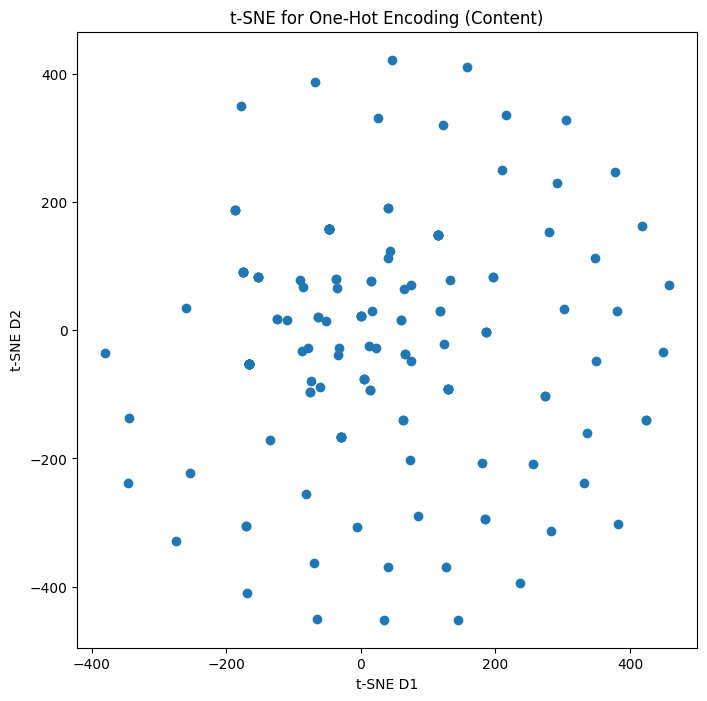

In [49]:
plot_tsne(one_hot_encoded_content, title="t-SNE for One-Hot Encoding (Content)")

#### t-SNE outcome: Scattered and poorly clustered, indicating minimal semantic relationship capture.
#### Reason: One-hot encoding represents words as sparse vectors with mostly zeros, neglecting semantic relationships between words.

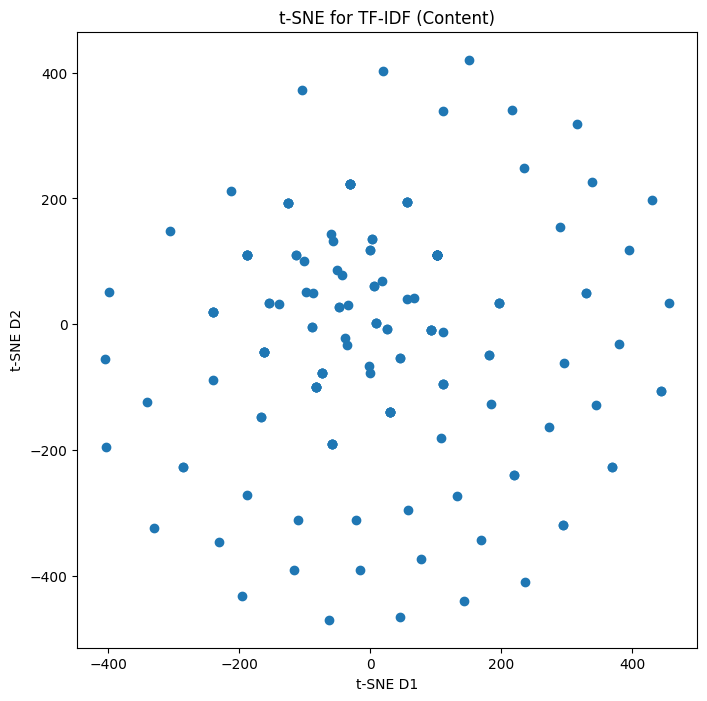

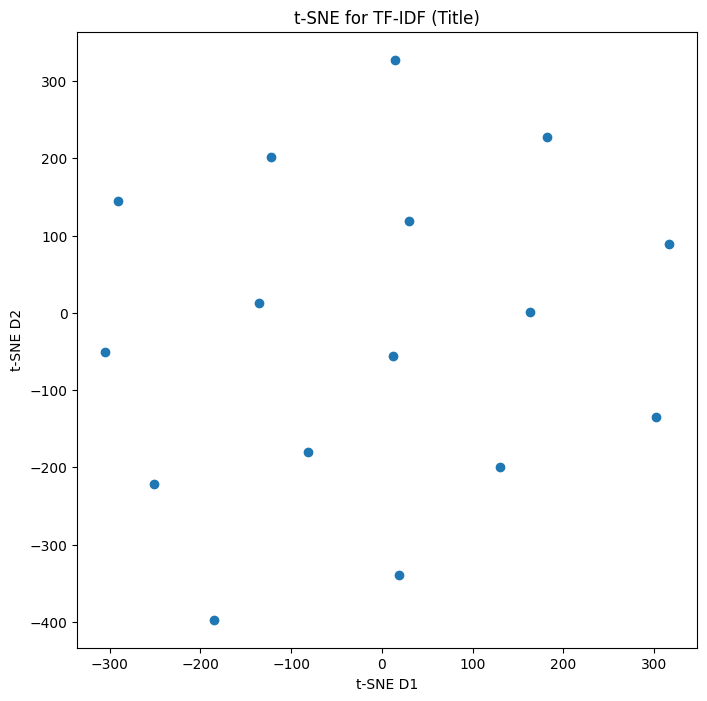

In [50]:
plot_tsne(tfidf_df.values, title="t-SNE for TF-IDF (Content)")
plot_tsne(tfidf_df_title.values, title="t-SNE for TF-IDF (Title)", perplexity=15)

#### t-SNE outcome: Some clustering may occur based on word frequency and document-specific importance. However, clusters might not reflect semantic similarity as well as Word2Vec or GloVe.
#### Reason: TF-IDF captures word importance but doesn't explicitly encode semantic relationships.

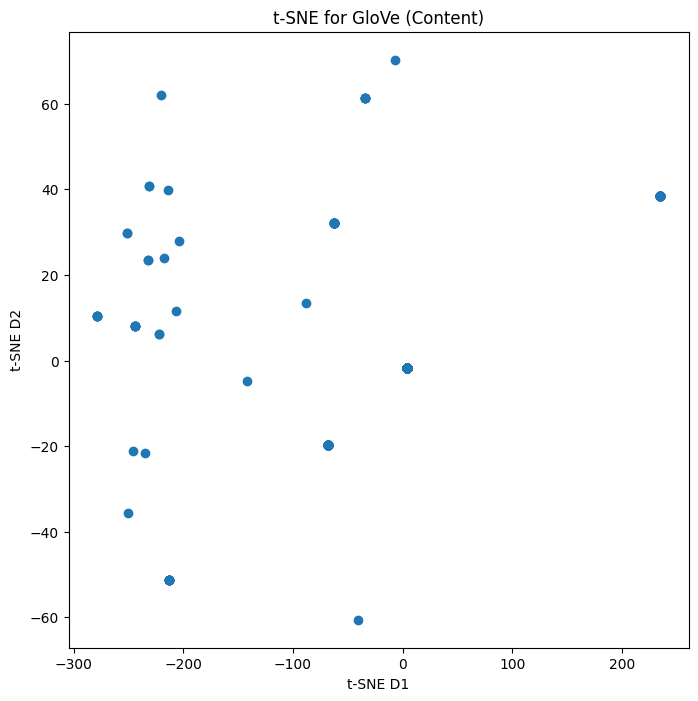

In [51]:
plot_tsne(glove_embeddings, title="t-SNE for GloVe (Content)")

#### t-SNE outcome: Similar to Word2Vec, forming clusters based on semantic relationships.
#### Reason: GloVe uses global word co-occurrence statistics, capturing semantic relationships effectively.


# General Conclusions:
- One-hot encoding: Least effective for tasks requiring semantic understanding.
- TF-IDF: Useful when considering word importance within documents, but less effective for capturing pure semantic relationships.
- Word embedding methods (Word2Vec, FastText, GloVe): Generally outperform the other methods in capturing semantic relationships and forming meaningful clusters.

## Choosing the Best Approach:
- Data size and nature: For smaller datasets or those with less context, TF-IDF might be sufficient. For larger datasets with rich context, word embedding methods are preferable.
- Importance of morphology: For languages with complex morphology, FastText might offer advantages.
- Computational resources: One-hot encoding and TF-IDF are less computationally expensive to train compared to word embedding methods.

### Also keeping in mind we only used 1 article from our data for better and faster results, including all articles may give more accurate results and visualizations, as well as drawing definitive conclusions